## **Proyecto de Programación para Analítica Descriptiva y Predictiva**
### **Nombre del Proyecto**: NFL: Estadísticas de Pase (2001 – 2023)
### **Grupo**: B
### **Autor**: Pablo Alejandro Aguirre Higuera
### **Matrícula**: 263845
### **Fecha**: 03/09/2025

### **1. Introducción**

A lo largo de este nuevo siglo, el juego aéreo se ha vuelto más predominante en la NFL (*National Football League*, por sus siglas en inglés). Cambios en la reglas que limitan el contacto defensivo hacia los receptores y que brindan protección adicional al mariscal de campo, han propiciado a los equipos a pasar el balón con mayor frecuencia. Por ello, se busca analizar las estadísticas de pase de todos los mariscales de campo de la NFL desde el año 2001 hasta 2023. A continuación, se muestran las preguntas a responder con el análisis a realizar:

**1.** ¿Qué tanto ha cambiado la cantidad de yardas lanzadas a lo largo de los años?

**2.** ¿Cómo se podría predecir la variable “Rate”, un indicador de eficiencia, respecto a: yardas, intentos, touchdowns, intercepciones, etc.?

**3.** Correlación entre “Rate” y la edad. ¿Cuál es el mejor periodo en la carrera de los mariscales de campo?

**4.** ¿Cuáles equipos han conseguido la mejor producción de sus mariscales? ¿Cuáles tienen la menor producción?

Los datos fueron recopilados del sitio *ProFootball Reference*, un repositorio de datos de la NFL mantenido por la compañía *Sports Reference*, dedicada a mantener bases de datos de diversos deportes.

### **2. Captura y Carga de Datos**

Se descargó un archivo csv desde el sitio *Kaggle* con el conjunto de datos a analizar. A continuación, se ejecutará código Python para cargar este conjunto de datos.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Dataset.csv")
print(df.shape)
print(df.columns)
df

(2350, 27)
Index(['Unnamed: 0', 'Player', 'Tm', 'Age', 'G', 'GS', 'Cmp', 'Att', 'Cmp%',
       'Yds', 'TD', 'TD%', 'Int', 'Int%', '1D', 'Lng', 'Y/A', 'AY/A', 'Y/C',
       'Y/G', 'Rate', 'Sk', 'Yds-s', 'Sk%', 'NY/A', 'ANY/A', 'Year'],
      dtype='object')


,Unnamed: 0,Player,Tm,Age,G,GS,Cmp,Att,Cmp%,Yds,...,AY/A,Y/C,Y/G,Rate,Sk,Yds-s,Sk%,NY/A,ANY/A,Year
0,0,Kurt Warner,STL,30,16,16,375,546,68.7,4830,...,8.4,12.9,301.9,101.4,38,233,6.5,7.87,7.41,2001
1,1,Peyton Manning,IND,25,16,16,343,547,62.7,4131,...,6.6,12.0,258.2,84.1,29,232,5.0,6.77,5.88,2001
2,2,Brett Favre,GNB,32,16,16,314,510,61.6,3921,...,7.6,12.5,245.1,94.1,22,151,4.1,7.09,7.02,2001
3,3,Aaron Brooks,NOR,25,16,16,312,558,55.9,3832,...,6.0,12.3,239.5,76.4,50,330,8.2,5.76,4.99,2001
4,4,Rich Gannon,OAK,36,16,16,361,549,65.8,3828,...,7.2,10.6,239.3,95.5,27,155,4.7,6.38,6.61,2001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2345,2389,Kadarius Toney,KAN,24,13,2,0,1,0.0,0,...,0.0,0.0,0.0,39.6,0,0,0.0,0.00,0.00,2023
2346,2390,Kyle Trask,TAM,25,2,0,0,1,0.0,0,...,0.0,0.0,0.0,39.6,0,0,0.0,0.00,0.00,2023
2347,2391,Garrett Wilson,NYJ,23,17,17,0,1,0.0,0,...,0.0,0.0,0.0,39.6,0,0,0.0,0.00,0.00,2023
2348,2392,Christian Kirk,JAX,27,12,12,1,2,50.0,-1,...,-0.5,-1.0,-0.1,56.2,0,0,0.0,-0.50,-0.50,2023


El conjunto de datos ha sido cargado con éxito. Se observa que se tienen **2350 observaciones y 26 variables**. No se tienen 27 variables a pesar de que se tienen 27 columnas como lo indica *df.shape*. Al imprimir los nombres de las columnas con *df.columns*, nótese que la primera columna no tiene nombre y solamente cuenta el número de observaciones desde cero. El método *drop* de Pandas perimite eliminar esta columna.

In [32]:
df.drop(["Unnamed: 0"], axis="columns", inplace=True)
df

,Player,Tm,Age,G,GS,Cmp,Att,Cmp%,Yds,TD,...,AY/A,Y/C,Y/G,Rate,Sk,Yds-s,Sk%,NY/A,ANY/A,Year
0,Kurt Warner,STL,30,16,16,375,546,68.7,4830,36,...,8.4,12.9,301.9,101.4,38,233,6.5,7.87,7.41,2001
1,Peyton Manning,IND,25,16,16,343,547,62.7,4131,26,...,6.6,12.0,258.2,84.1,29,232,5.0,6.77,5.88,2001
2,Brett Favre,GNB,32,16,16,314,510,61.6,3921,32,...,7.6,12.5,245.1,94.1,22,151,4.1,7.09,7.02,2001
3,Aaron Brooks,NOR,25,16,16,312,558,55.9,3832,26,...,6.0,12.3,239.5,76.4,50,330,8.2,5.76,4.99,2001
4,Rich Gannon,OAK,36,16,16,361,549,65.8,3828,27,...,7.2,10.6,239.3,95.5,27,155,4.7,6.38,6.61,2001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2345,Kadarius Toney,KAN,24,13,2,0,1,0.0,0,0,...,0.0,0.0,0.0,39.6,0,0,0.0,0.00,0.00,2023
2346,Kyle Trask,TAM,25,2,0,0,1,0.0,0,0,...,0.0,0.0,0.0,39.6,0,0,0.0,0.00,0.00,2023
2347,Garrett Wilson,NYJ,23,17,17,0,1,0.0,0,0,...,0.0,0.0,0.0,39.6,0,0,0.0,0.00,0.00,2023
2348,Christian Kirk,JAX,27,12,12,1,2,50.0,-1,0,...,-0.5,-1.0,-0.1,56.2,0,0,0.0,-0.50,-0.50,2023


Se ha obtenido el resultado deseado con el método *drop*.

### **3. Transformación y Preprocesamiento - *Data Wrangling***

#### - Explicación sobre cada una de las problemáticas encontradas, las soluciones y el código

#### **3.1 Identificación de Tipos de Datos y Cantidad de Valores Nulos**

In [33]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2350 entries, 0 to 2349
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  2350 non-null   object 
 1   Tm      2350 non-null   object 
 2   Age     2350 non-null   int64  
 3   G       2350 non-null   int64  
 4   GS      2350 non-null   int64  
 5   Cmp     2350 non-null   int64  
 6   Att     2350 non-null   int64  
 7   Cmp%    2350 non-null   float64
 8   Yds     2350 non-null   int64  
 9   TD      2350 non-null   int64  
 10  TD%     2350 non-null   float64
 11  Int     2350 non-null   int64  
 12  Int%    2350 non-null   float64
 13  1D      2350 non-null   int64  
 14  Lng     2350 non-null   int64  
 15  Y/A     2350 non-null   float64
 16  AY/A    2350 non-null   float64
 17  Y/C     2350 non-null   float64
 18  Y/G     2350 non-null   float64
 19  Rate    2350 non-null   float64
 20  Sk      2350 non-null   int64  
 21  Yds-s   2350 non-null   int64  
 22  

Arriba se aprecia que cada columna contiene 2350 datos no nulos, y siendo que este es el número de observaciones totales, se concluye que **no se tienen valores nulos**. *Casi* todas las columnas tienen los tipos de datos adecuados. Las numéricas son del tipo entero donde no se manejan proporciones o porcentajes. En estas últimas se manejan datos de punto flotante. La columna de jugadores está correctamente catalogada con datos de tipo texto. 

La columna *Tm* (iniciales del equipo) es conveniente cambiarle a dato de tipo <u>categórico</u>. ¿Por qué? Solamente existen 32 equipos en la *NFL*, y aún tomando en cuenta que algunos han cambiado su sede (más adelante se platicarán más detalles al respecto), no es un dato tan específico como lo es un nombre en términos de texto. Adicionalmente, los equipos pueden verse como una categoría o clase a fin de averiguar cuáles equipos han tenido mayor producción de sus mariscales de campo. 

In [34]:
df["Tm"] = df["Tm"].astype("category")
print(df["Tm"].dtype)

category


Se ha hecho el cambio de texto a categoría en la columna *Tm*.

#### **3.2 Cantidad de Valores Duplicados**

Si bien no hay valores nulos, no se puede dejar de lado la importancia de tratar debidamente a los valores duplicados. En este contexto, un valor duplicado consiste en duplicidad parcial en las siguientes columnas: <u>*Player* (jugador)</u>, <u>*Tm* (equipo)</u> y <u>*Year* (año)</u>. 

Es posible que un jugador cambie de equipo en algún punto de la temporada debido a terminación de contrato o un canje, por lo que un jugador A podría haber sido parte del equipo 1 y el equipo 2 en un mismo año. Luego, un jugador puede haber participado en múltiples temporadas <u>mas no múltiples veces en una misma temporada con un mismo equipo</u>.

Antes de buscar por valores duplicados, se debe asegurar que los nombres de los jugadores estén bien escritos.

In [35]:
df["Player"] = df["Player"].str.strip() #Asegura que no haya espacios sobrantes
df["Player"] = df["Player"].str.title() #Asegura que el primer nombre y apellido(s) inicien con mayúsculas
print(df["Player"].unique())

['Kurt Warner' 'Peyton Manning' 'Brett Favre' 'Aaron Brooks' 'Rich Gannon'
 'Trent Green' 'Kerry Collins' 'Jake Plummer' 'Jeff Garcia' 'Doug Flutie'
 'Brad Johnson' 'Steve Mcnair' 'Mark Brunell' 'Jay Fiedler'
 'Donovan Mcnabb' 'Jon Kitna' 'Kordell Stewart' 'Tim Couch' 'Elvis Grbac'
 'Chris Weinke' 'Chris Chandler' 'Tom Brady' 'Brian Griese'
 'Vinny Testaverde' 'Daunte Culpepper' 'Charlie Batch' 'Tony Banks'
 'Jim Miller' 'Alex Van Pelt' 'Matt Hasselbeck' 'Rob Johnson'
 'Quincy Carter' 'Trent Dilfer' 'Ty Detmer' 'Todd Bouman' 'Michael Vick'
 'Shane Matthews' 'Mike Mcmahon' 'Randall Cunningham' 'Anthony Wright'
 "Neil O'Donnell" 'Ryan Leaf' 'Spergon Wynn' 'Drew Bledsoe'
 'Jonathan Quinn' 'Clint Stoerner' 'Gus Frerotte' 'Drew Brees'
 'Shaun King' 'Travis Brown' 'Jeff George' 'Tommy Maddox' 'A.J. Feeley'
 'Matt Lytle' 'Kent Graham' 'Brock Huard' 'Kelly Holcomb'
 'Chad Pennington' 'Jarious Jackson' 'David Patten' 'Mark Rypien'
 'Koy Detmer' 'Az-Zahir Hakim' 'Ray Lucas' 'Todd Collins' 'Tony 

Se ha estandarizado con éxito la forma en que se escriben los nombres. Ahora es momento de buscar por valores duplicados.

In [36]:
print("Número de valores duplicados:\n",
      df.duplicated(subset=["Player", "Tm", "Year"], keep=False).sum()
      )

Número de valores duplicados:
 0


#### **3.3 Preprocesamiento Adicional**

##### **3.3.1 Nombres de los Equipos**

Vale la pena mencionar que desde el 2001 hasta el 2023 hubo equipos que cambiaron de sede; *Rams* y *Chargers* siendo los más notables. Se deben verificar los valores de la columna *Tm* para asegurar que se pueda identificar a estos equipos.

In [37]:
print(df["Tm"].value_counts().sort_index()) #Esta opción permitía imprimir todos los valores distintos de la columna Tm

Tm
2TM    34
3TM     1
ARI    79
ATL    64
BAL    69
BUF    75
CAR    75
CHI    80
CIN    65
CLE    90
DAL    73
DEN    67
DET    65
GNB    60
HOU    73
IND    59
JAX    70
KAN    78
LAC    21
LAR    33
LVR    17
MIA    78
MIN    71
NOR    60
NWE    67
NYG    56
NYJ    95
OAK    58
PHI    79
PIT    86
SDG    43
SEA    58
SFO    64
STL    54
TAM    68
TEN    86
WAS    79
Name: count, dtype: int64


STL y LAR ambos se refieren a los *Rams*, similar a SDG y LAC con los *Chargers*. Se reemplazarán los valores STL y SDG por LAR y LAC, respectivamente. De igual forma, se reemplazarán de la siguiente manera los valores mostrados a continuación:

GNB será GB (*Green Bay*)

KAN será KC (*Kansas City*)

LVR será LV (*Las Vegas*)

NOR será NO (*New Orleans*)

NWE será NE (*New England*)

OAK será LV (*Oakland Raiders* cambió a *<u>Las Vegas</u> Raiders*)

SFO será SF (*San Francisco*)


In [38]:
df["Tm"].replace({"STL" : "LAR",
                  "SDG" : "LAC",
                  "GNB" : "GB",
                  "KAN" : "KC",
                  "LVR": "LV",
                  "NOR" : "NO",
                  "NWE" : "NE",
                  "OAK" : "LV",
                  "SFO" : "SF"}, inplace=True)

print(df["Tm"].value_counts().sort_index())

Tm
2TM    34
3TM     1
ARI    79
ATL    64
BAL    69
BUF    75
CAR    75
CHI    80
CIN    65
CLE    90
DAL    73
DEN    67
DET    65
GB     60
HOU    73
IND    59
JAX    70
KC     78
LAC    64
LAR    87
LV     75
MIA    78
MIN    71
NO     60
NE     67
NYG    56
NYJ    95
PHI    79
PIT    86
SEA    58
SF     64
TAM    68
TEN    86
WAS    79
Name: count, dtype: int64


C:\Users\pablo\AppData\Local\Temp\ipykernel_27000\4138098079.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Tm"].replace({"STL" : "LAR",
C:\Users\pablo\AppData\Local\Temp\ipykernel_27000\4138098079.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df["Tm"].replace({"STL" : "LAR",


In [39]:
print("Cantidad de equipos:", len(df["Tm"].unique()))

Cantidad de equipos: 34


Se hicieron los reemplazos con éxito. No obstante, resalta que los jugadores estuvieron más de un equipo en una misma temporada están marcados con las etiquetas "2TM" y "3TM". Abajo se muestran las líneas que cuentan con esta característica:

In [40]:
df_tms = df[(df["Tm"] == "2TM") | (df["Tm"] == "3TM")]
df_tms

,Player,Tm,Age,G,GS,Cmp,Att,Cmp%,Yds,TD,...,AY/A,Y/C,Y/G,Rate,Sk,Yds-s,Sk%,NY/A,ANY/A,Year
184,Kevin Lockett,2TM,28,13,4,1,1,100.0,14,1,...,34.0,14.0,1.1,158.3,0,0,0.0,14.00,34.00,2002
272,Rob Johnson,2TM,30,4,0,11,20,55.0,93,0,...,2.4,8.5,23.3,46.5,4,21,16.7,3.00,1.13,2003
318,Nick Harris,2TM,25,16,0,0,1,0.0,0,0,...,0.0,0.0,0.0,39.6,0,0,0.0,0.00,0.00,2003
323,Kevin Johnson,2TM,27,15,9,0,1,0.0,0,0,...,0.0,0.0,0.0,39.6,0,0,0.0,0.00,0.00,2003
331,Mark Royals,2TM,38,14,0,0,1,0.0,0,0,...,-45.0,0.0,0.0,0.0,0,0,0.0,0.00,-45.00,2003
636,Carlyle Holiday,2TM,25,8,2,0,1,0.0,0,0,...,0.0,0.0,0.0,39.6,0,0,0.0,0.00,0.00,2006
668,Joshua Dobbs,2TM,28,13,12,262,417,62.8,2464,13,...,5.5,9.4,189.5,79.5,30,217,6.7,5.03,4.60,2007
816,Mark Bradley,2TM,26,12,8,1,1,100.0,37,1,...,57.0,37.0,3.1,158.3,0,0,0.0,37.00,57.00,2008
915,Tyler Thigpen,2TM,25,2,0,4,8,50.0,83,1,...,1.6,20.8,41.5,87.0,0,0,0.0,10.38,1.63,2009
945,Braylon Edwards,2TM,26,16,15,0,1,0.0,0,0,...,0.0,0.0,0.0,39.6,0,0,0.0,0.00,0.00,2009


Dando un vistazo a la tabla de arriba, resalta la cantidad de jugadores con 1 o 2 intentos de pase en una temporada. La causa de tan pocos intentos de pase es que son receptores o corredores que, en alguna jugada de truco, lanzaron el balón.

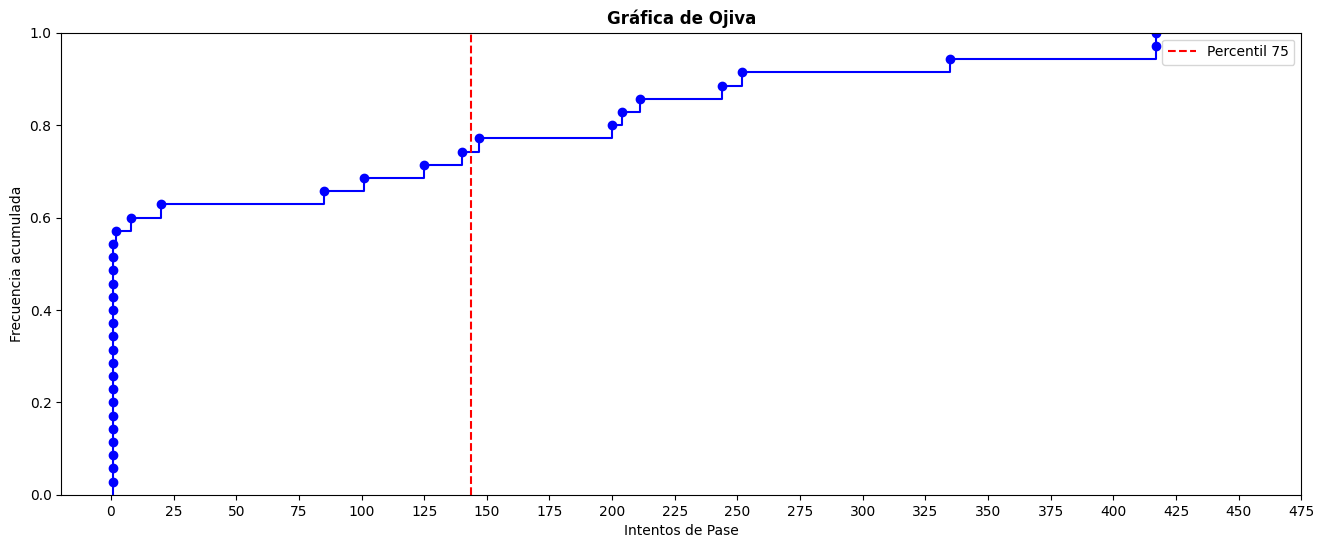

In [ ]:
plt.figure(figsize=(16, 6))
sns.ecdfplot(data=df_tms["Att"], marker="o", color="blue")
plt.axvline(df_tms["Att"].quantile(0.75), color="red", linestyle="dashed", label="Percentil 75")

plt.title("Gráfica de Ojiva", fontweight="bold")
plt.xlabel("Intentos de Pase")
plt.xticks(range(0, 500, 25))

plt.ylabel("Frecuencia acumulada")
plt.legend()
plt.show()

Yendo más a detalle, se nota que más de la mitad de los lanzadores con esta condición de múltiples equipos tienen 2 o menos intentos de pase en una temporada. En la gráfica de arriba se muestran las frecuencias acumuladas y se observa que el 75% de los lanzadores ni siquiera sobrepasan los 150 intentos en una temporada (menos de 10 intentos por partido).

Para las muy pocas observaciones con un número más significante de intentos, habría que indagar más a fondo en *ProFootballReference* para obtener el quiebre de las estadísticas para cada equipo. Dado que los posibles beneficios no están a la par con el trabajo que esto representaría, es razonable filtrar fuera los jugadores con múltiples equipos.

In [ ]:
df = df[~(df["Tm"] == "2TM") & ~(df["Tm"] == "3TM")] #~ es el complemento de

print("Número de equipos:", df["Tm"].nunique())
print(df["Tm"].value_counts().sort_index())

Número de equipos: 32
Tm
2TM     0
3TM     0
ARI    79
ATL    64
BAL    69
BUF    75
CAR    75
CHI    80
CIN    65
CLE    90
DAL    73
DEN    67
DET    65
GB     60
HOU    73
IND    59
JAX    70
KC     78
LAC    64
LAR    87
LV     75
MIA    78
MIN    71
NO     60
NE     67
NYG    56
NYJ    95
PHI    79
PIT    86
SEA    58
SF     64
TAM    68
TEN    86
WAS    79
Name: count, dtype: int64


Se ha solucionado el tema del nombre de los equipos y se tiene un formato consistente en esta columna.

#### **3.3.2 Nombres de las Columnas**

Como se habrá visto en la sección 3.1, algunas columnas tienen su nombre solamente en mayúsculas y otras no. Todas tendrán sus nombres en mayúsculas y la columna *Tm* se cambiará a *TEAM* a fin de identificarla más fácilmente.

In [70]:
df.rename(columns={"Tm" : "TEAM"}, inplace=True)
df.columns = df.columns.str.upper()
print(df.columns)

Index(['PLAYER', 'TEAM', 'AGE', 'G', 'GS', 'CMP', 'ATT', 'CMP%', 'YDS', 'TD',
       'TD%', 'INT', 'INT%', '1D', 'LNG', 'Y/A', 'AY/A', 'Y/C', 'Y/G', 'RATE',
       'SK', 'YDS-S', 'SK%', 'NY/A', 'ANY/A', 'YEAR'],
      dtype='object')


Se han ajustado exitosamente los nombres de las columnas.

# **4. Análisis Descriptivo de Datos**

## - Preguntas a responder con el AD
## - Explicación de Estadísticas Básicas Aplicadas, Visualización de Datos con Gráficos, y Resumen de las respuestas

# **5. Análisis Exploratorio de los Datos**

## - Preguntas a responder
## - Estadísticas Empleadas, visualización y Resumen de las respuestas encontradas.

# **6. Análisis Predictivo**

## - Preprocesamiento para Análisis Predictivo: Problemas, Técnicas y Código

## - Modelado Predictivo
### - Modelo elegido y parámetros
### - Entrenamiento y Evaluación
## - Resultados


# **7. Conclusiones y Trabajos Futuros**

## - Resumen del trabajo realizado, hallazgos y posibles mejoras